In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

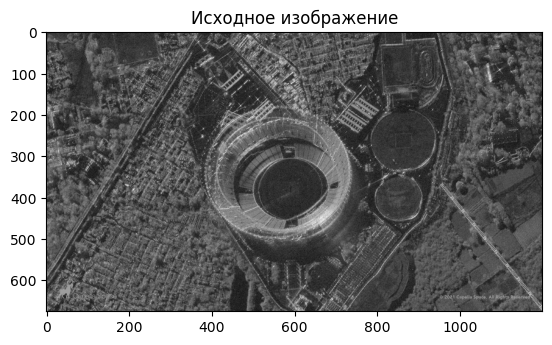

In [3]:
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.show()

In [4]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]], dtype=uint8)

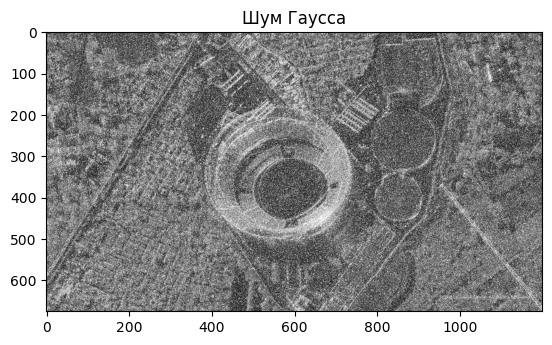

In [5]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Шум Гаусса")
plt.show()

In [6]:
rows, cols = image_gray.shape
noisy = np.copy(image_gray)
salt_count = int(0.1 * image_gray.size)
pepper_count = int(0.1 * image_gray.size)

In [7]:
salt_row = np.random.randint(0, rows, size=salt_count)
salt_col = np.random.randint(0, cols, size=salt_count)
noisy[salt_row, salt_col] = 255

In [8]:
pepper_row = np.random.randint(0, rows, size=pepper_count)
pepper_col = np.random.randint(0, cols, size=pepper_count)
noisy[pepper_row, pepper_col] = 0

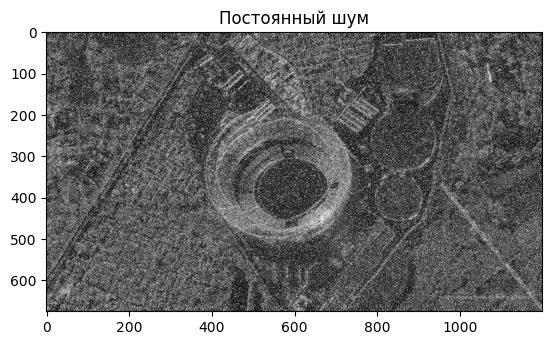

In [9]:
plt.imshow(noisy, cmap = "gray")
plt.title("Постоянный шум")
plt.show()

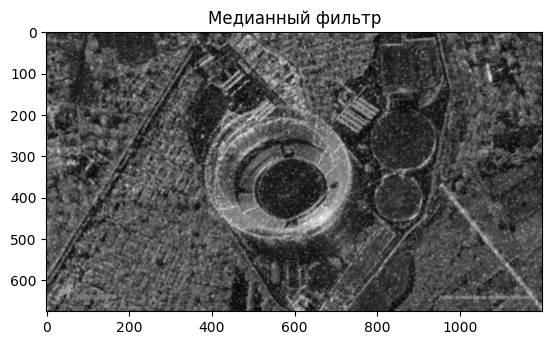

In [10]:
median_filtered = cv2.medianBlur(image_noise_gauss, 5)
plt.imshow(median_filtered, cmap = "gray")
plt.title("Медианный фильтр")
plt.show()

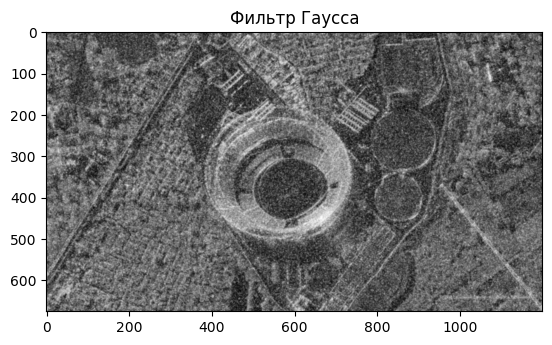

In [11]:
gaussian_filtered = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
plt.imshow(gaussian_filtered, cmap = "gray")
plt.title("Фильтр Гаусса")
plt.show()

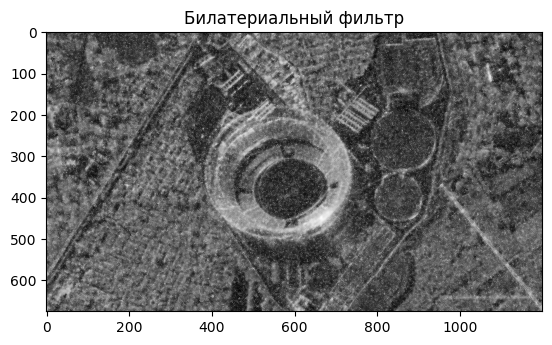

In [12]:
bilateral_filtered = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
plt.imshow(bilateral_filtered, cmap = "gray")
plt.title("Билатериальный фильтр")
plt.show()

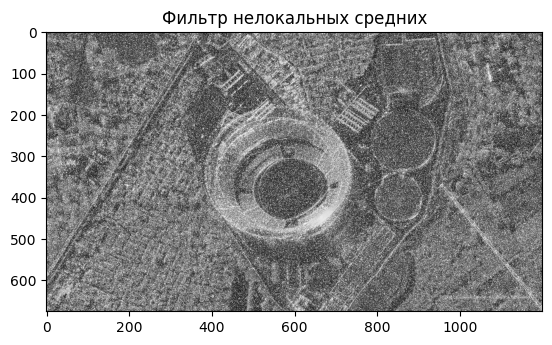

In [13]:
nlm_filtered = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(nlm_filtered, cmap = "gray")
plt.title("Фильтр нелокальных средних")
plt.show()

In [14]:
from skimage.metrics import mean_squared_error

In [18]:
def calculate_psnr(original, filtered):
    mse = mean_squared_error(original, filtered)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

In [19]:
psnr_results = {
    "Медианный фильтр": calculate_psnr(image_gray, median_filtered),
    "Фильтр Гаусса": calculate_psnr(image_gray, gaussian_filtered),
    "Билатериальный фильтр": calculate_psnr(image_gray, bilateral_filtered),
    "Фильтр нелокальных средних": calculate_psnr(image_gray, nlm_filtered),
}

In [20]:
best_filter = max(psnr_results, key=psnr_results.get)
best_psnr = psnr_results[best_filter]

In [21]:
for filter_name, psnr in psnr_results.items():
    print(f"{filter_name}: PSNR = {psnr}")

Медианный фильтр: PSNR = 19.64257487509534
Фильтр Гаусса: PSNR = 15.664240373102443
Билатериальный фильтр: PSNR = 15.488418875538056
Фильтр нелокальных средних: PSNR = 11.871265953276968


In [22]:
print(f"Лучший фильтр: {best_filter} PSNR = {best_psnr:.2f}")

Лучший фильтр: Медианный фильтр PSNR = 19.64
